In [72]:
#Import Modules to be used in our analysis
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt



In [68]:
#Request the data
bs = requests.get(f'https://financialmodelingprep.com/api/v3/financials/balance-sheet-statement/MSFT?period=quarter')
bs = bs.json()
#Converting the bs dictionary into a pandas Dataframe and Transpose it
bs = bs['financials']

bs = pd.DataFrame.from_dict(bs)

bs = bs.T

bs.columns = bs.iloc[-1]


date,2019-12-31,2019-09-30,2019-06-30,2019-03-31,2018-12-31,2018-09-30,2018-06-30,2018-03-31,2017-12-31,2017-09-30,...,2011-09-30,2011-06-30,2011-03-31,2010-12-31,2010-09-30,2010-06-30,2010-03-31,2009-12-31,2009-09-30,2009-06-30
Cash and cash equivalents,8864000000.0,13117000000.0,11356000000.0,11212000000.0,6638000000.0,15137000000.0,11946000000.0,9221000000.0,12859000000.0,6884000000.0,...,12881000000.0,9610000000.0,7021000000.0,4023000000.0,8161000000.0,5505000000.0,8155000000.0,36099000000.0,36728000000.0,31447000000.0
Cash and short-term investments,1.34253e+11,1.36636e+11,1.41008e+11,1.38479e+11,1.30931e+11,1.46788e+11,1.33768e+11,1.3227e+11,1.4278e+11,1.38471e+11,...,57403000000.0,52772000000.0,50150000000.0,41252000000.0,44173000000.0,36788000000.0,39666000000.0,36099000000.0,36728000000.0,31447000000.0
Deferred revenue,27343000000.0,29904000000.0,32676000000.0,24251000000.0,24285000000.0,26704000000.0,28905000000.0,21370000000.0,21309000000.0,22778000000.0,...,14345000000.0,15722000000.0,11887000000.0,12063000000.0,12767000000.0,13652000000.0,11171000000.0,12528000000.0,14768000000.0,14284000000.0
Deposit Liabilities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Goodwill and Intangible Assets,49374000000.0,49621000000.0,49776000000.0,49964000000.0,50059000000.0,43434000000.0,43736000000.0,44126000000.0,44389000000.0,44987000000.0,...,13563000000.0,13325000000.0,13394000000.0,13494000000.0,13548000000.0,13552000000.0,13745000000.0,13714000000.0,14235000000.0,14262000000.0
Inventories,1823000000.0,2622000000.0,2063000000.0,1951000000.0,1961000000.0,3614000000.0,2662000000.0,2084000000.0,2003000000.0,3211000000.0,...,2270000000.0,1372000000.0,1056000000.0,861000000.0,1242000000.0,740000000.0,501000000.0,589000000.0,1150000000.0,717000000.0
Investments,1.28144e+11,1.26203e+11,1.30852e+11,1.28467e+11,1.25393e+11,1.32471e+11,1.21822e+11,1.23049e+11,1.29921e+11,1.31587e+11,...,53098000000.0,54027000000.0,53877000000.0,47251000000.0,45223000000.0,39037000000.0,39308000000.0,6976000000.0,6006000000.0,4933000000.0
Long-term debt,63361000000.0,66478000000.0,66662000000.0,66585000000.0,69653000000.0,69733000000.0,72242000000.0,73480000000.0,73348000000.0,76255000000.0,...,11927000000.0,11921000000.0,11915000000.0,9671000000.0,9665000000.0,4939000000.0,3746000000.0,3746000000.0,3746000000.0,3746000000.0
Long-term investments,2755000000.0,2684000000.0,1200000000.0,1200000000.0,1100000000.0,820000000.0,0.0,0.0,0.0,0.0,...,8576000000.0,10865000000.0,10748000000.0,10022000000.0,9211000000.0,7754000000.0,7797000000.0,6976000000.0,6006000000.0,4933000000.0
Net Debt,60744000000.0,56378000000.0,60822000000.0,61888000000.0,66531000000.0,61093000000.0,64294000000.0,67706000000.0,63935000000.0,70421000000.0,...,2291000000.0,2311000000.0,4894000000.0,5648000000.0,2504000000.0,434000000.0,-2160000000.0,-30104000000.0,-30732000000.0,-25701000000.0


In [69]:
#Cleaning up the data frame, keeping items from the last 4 months
cols = bs.columns

bs = bs.iloc[:25,:4]

cols = bs.columns

bs[cols] = bs[cols].astype(float)





In [80]:
#Extract the total assets number from each quarter  then we store them
#in a list called allassets and perform and weighted percentage calculation
#We will ouput balance sheet items as a percentage of the total assets number

assetsQ1 = bs.iloc[21,0]

assetsQ2 = bs.iloc[21,1]

assetsQ3 = bs.iloc[21,2]

assetsQ4 = bs.iloc[21,3]

allassets = [assetsQ1, assetsQ2, assetsQ3, assetsQ4]

bs[cols] = (bs[cols] / allassets) * 100

pd.options.display.float_format = '{:2f}%'.format


bs.head()

date,2019-12-31,2019-09-30,2019-06-30,2019-03-31
Cash and cash equivalents,3.134437%,4.702192%,3.962925%,4.258568%
Cash and short-term investments,47.473780%,48.981377%,49.207834%,52.597415%
Deferred revenue,9.668876%,10.720009%,11.403007%,9.211071%
Deposit Liabilities,0.000000%,0.000000%,0.000000%,0.000000%
Goodwill and Intangible Assets,17.459352%,17.788174%,17.370427%,18.977442%


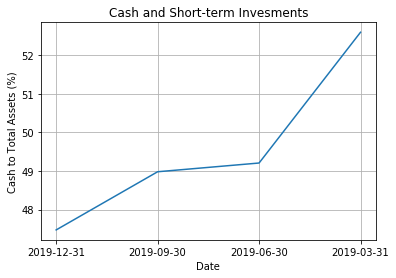

In [84]:
#Visualize our fully automated balance sheet analysis
#We notice that Microsoft has been maintaining a high amount of cash
#in the past four quarters which begs the question: Did they expect
#an economic downturn in the near term?

%matplotlib inline 
fig, ax = plt.subplots()
# Turn on the grid
ax.grid()
plt.title('Cash and Short-term Invesments')
plt.plot(bs.iloc[1])
plt.xlabel('Date')
plt.ylabel('Cash to Total Assets (%)')
plt.show()